In [8]:
!ls

requirements.txt  telecom_churn_analysis.ipynb	telecom_churn.csv


## Import libraries

In [9]:
# ! python3 -m pip freeze > requirements.txt

In [10]:
# ! cat requirements.txt | grep imblearn

In [11]:
# conda install conda-forge::imbalanced-learn

In [12]:
! pip install imblearn

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    train_test_split,
    cross_val_score,
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    average_precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    auc,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder
)
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
# from imblearn.pipeline import Pipeline

warnings.filterwarnings('ignore')
%matplotlib inline

## Data understanding

In [14]:
# Load dataset
df = pd.read_csv('telecom_churn.csv', encoding='utf8')

# Check first 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

No missing data

In [16]:
df.duplicated().sum()

0

In [17]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [18]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [19]:
df.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


## Data prep

In [20]:
# Get features and target variables

X = df.drop(columns=['churn', 'phone number'])
y = df['churn']

In [21]:
print(X.columns)
print(y)

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')
0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: churn, Length: 3333, dtype: bool


In [22]:
X.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [52]:
# Convert binary features

X_binary_features = X[['voice mail plan', 'international plan']]
X_binary_features_ = X_binary_features.apply()

,voice mail plan,international plan
0,yes,no
1,yes,no
2,no,no
3,no,yes
4,no,yes
...,...,...
3328,yes,no
3329,no,no
3330,no,no
3331,no,yes


In [53]:
X_categorical = ['state', 'area code']
X_categorical_features = X[X_categorical]
X_categorical_features.map({'yes': 1, 'no': 0})
X_categorical_features

AttributeError: 'DataFrame' object has no attribute 'map'

In [23]:
# Deal with categorical features
X_categorical = X.select_dtypes(exclude=['int64', 'float64']).copy()
X_categorical

,state,international plan,voice mail plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no
4,OK,yes,no
...,...,...,...
3328,AZ,no,yes
3329,WV,no,no
3330,RI,no,no
3331,CT,yes,no


In [24]:
# Converting categorical variables to numeric using One-Hot Encoding
X_encoded = pd.get_dummies(
    X,
    columns=list(X_categorical.columns),
    drop_first=True
)

In [25]:
X_encoded.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0


In [26]:
y.value_counts()

False    2850
True      483
Name: churn, dtype: int64

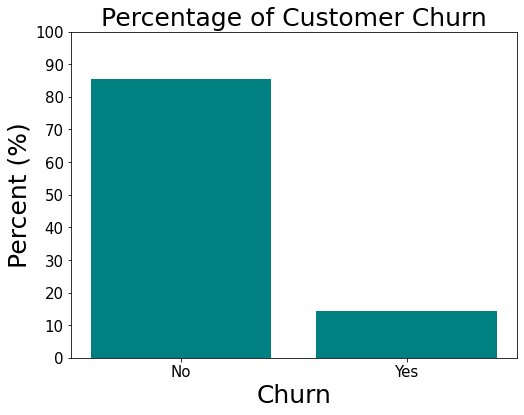

In [27]:
#Let's visualize the churn rate
fig,ax = plt.subplots(figsize=(8,6))
plt.bar(x = y.unique(), height = round(y.value_counts(normalize=True)*100, 2), color="teal")
plt.xticks(ticks=[0,1], labels=["No", "Yes"], fontsize = 15)
plt.yticks(ticks=list(range(0, 110, 10)), fontsize = 15)
ax.set_xlabel("Churn", fontsize = 25)
ax.set_ylabel("Percent (%)", fontsize = 25)
ax.set_title("Percentage of Customer Churn",fontsize = 25)
plt.show()

In [28]:
# Convert churn values to 1 for customers who churn
# and 0 for those who don't
y = y.astype('int')
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [29]:
def print_metrics(labels, preds):
    print("Precision Score: {0:0.04f}".format(precision_score(labels, preds)))
    print("Recall Score: {0:0.04f}".format(recall_score(labels, preds)))
    print("Accuracy Score: {0:0.04f}".format(accuracy_score(labels, preds)))
    print("F1 Score: {0:0.04f}".format(f1_score(labels, preds)))

In [ ]:
#examining how each feature ended up being important in our decison tree.
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    feature_names = X_train.columns.values
    feature_importances = model.feature_importances_
    indices = np.argsort(feature_importances)[::+1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features),feature_importances[indices], align='center') 
    plt.yticks(np.arange(n_features), feature_names[indices]) 
    plt.xlabel('Feature importance')

## Modelling

### Model 1

all features except *phone number*, 
1. *k = 3*
2. Class imbalanced

Training metrics
Precision Score: 0.9028
Recall Score: 0.3824
Accuracy Score: 0.9040
F1 Score: 0.5372

Testing metrics
Precision Score: 0.4667
Recall Score: 0.0979
Accuracy Score: 0.8550
F1 Score: 0.1618

ROC Score - KNN: 53.959999999999994

Confusion matrix
 [[841  16]
 [129  14]]

AUC: 0.6401620549811916


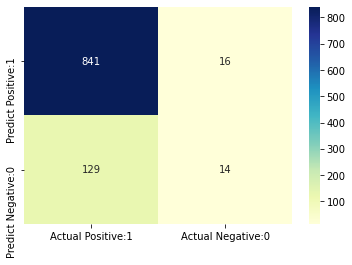

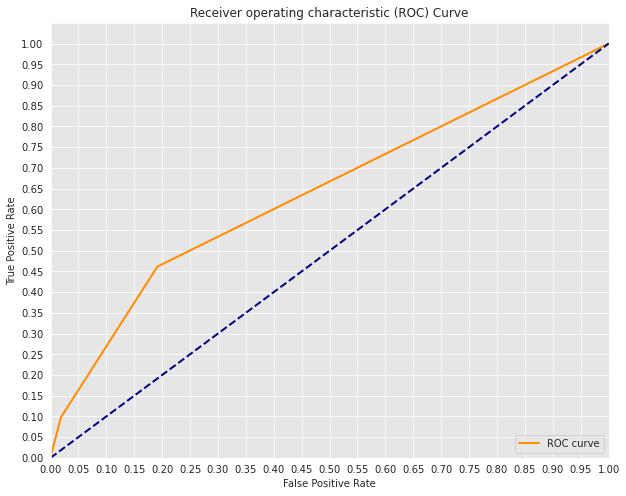

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       857
           1       0.47      0.10      0.16       143

    accuracy                           0.85      1000
   macro avg       0.67      0.54      0.54      1000
weighted avg       0.81      0.85      0.81      1000



In [30]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=[X_train.columns])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=[X_train.columns])

# Instantiate the model
knn1 = KNeighborsClassifier(n_neighbors=3)

# fit the model
knn1.fit(X_train_scaled, y_train)

# Predict using the model on training set
y_pred_train = knn1.predict(X_train_scaled)

# Predict using the model on test set
y_pred = knn1.predict(X_test_scaled)

print("Training metrics")
print_metrics(y_train, y_pred_train)

print("\nTesting metrics")
print_metrics(y_test, y_pred)

# Score the model
y_scores = knn1.predict_proba(X_test_scaled)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])

# Roc score
knn1_roc_score = roc_auc_score(y_test, y_pred)
print(f'\nROC Score - KNN: {round(knn1_roc_score, 4) * 100}')

# Plot confusion matrix
knn1_confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion matrix\n', knn1_confusion_matrix)
plt.figure(figsize=(6,4))
knn1_cm_matrix = pd.DataFrame(data=knn1_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(knn1_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Get AUC values
knn1_auc = auc(fpr, tpr)
print(f'\nAUC: {knn1_auc}')

# Draw ROC curve
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display classification report
print(classification_report(y_test, y_pred))

### Class imbalance

In [31]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    2850
1     483
Name: churn, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    1993
0    1993
Name: churn, dtype: int64


In [32]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=[X_train_resampled.columns])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=[X_train_resampled.columns])

In [33]:
X_train_scaled

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,-0.568025,1.729764,-0.534041,0.211779,0.901391,0.211920,1.095541,-1.791590,1.096221,-0.515168,...,-0.123623,-0.108052,-0.118285,-0.110403,-0.116085,-0.123623,-0.132723,-0.119371,-0.318448,-0.477861
1,-1.027059,1.729764,-0.534041,-0.927720,1.112862,-0.928051,-2.772475,-2.060918,-2.771340,-0.873386,...,-0.123623,-0.108052,-0.118285,-0.110403,-0.116085,-0.123623,7.534462,-0.119371,-0.318448,-0.477861
2,0.404048,1.729764,0.437592,0.516738,0.372714,0.516683,-1.090729,0.955553,-1.089587,-0.481453,...,-0.123623,-0.108052,-0.118285,-0.110403,-0.116085,-0.123623,-0.132723,8.377265,-0.318448,2.092658
3,-0.811043,-0.518949,-0.534041,1.466047,0.478449,1.465695,-0.305914,-1.791590,-0.305240,1.124209,...,-0.123623,9.254846,-0.118285,-0.110403,-0.116085,-0.123623,-0.132723,-0.119371,-0.318448,-0.477861
4,0.512056,1.729764,2.947645,-0.189915,0.848523,-0.190253,-0.608228,-1.629994,-0.609086,-0.854422,...,-0.123623,-0.108052,-0.118285,-0.110403,-0.116085,-0.123623,-0.132723,-0.119371,-0.318448,2.092658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,2.348193,-0.566291,-0.534041,-0.959315,-1.107583,-0.959453,0.219096,0.901687,0.219811,-0.673702,...,-0.123623,-0.108052,-0.118285,-0.110403,-0.116085,-0.123623,-0.132723,-0.119371,-0.318448,-0.477861
3982,0.215034,-0.518949,-0.534041,-0.856236,0.425581,-0.856264,-0.577882,-0.283355,-0.576990,1.037520,...,-0.123623,-0.108052,-0.118285,-0.110403,-0.116085,-0.123623,-0.132723,-0.119371,-0.318448,-0.477861
3983,-1.027059,-0.518949,-0.534041,1.367676,-1.583393,1.367646,0.647294,-0.175624,0.648128,-0.589698,...,-0.123623,-0.108052,-0.118285,-0.110403,-0.116085,-0.123623,-0.132723,-0.119371,-0.318448,-0.477861
3984,1.160104,1.729764,-0.534041,1.466892,-0.261699,1.467309,0.687190,-0.498817,0.687311,-1.702360,...,-0.123623,-0.108052,-0.118285,-0.110403,-0.116085,-0.123623,-0.132723,-0.119371,-0.318448,-0.477861


In [34]:
y_train_resampled.value_counts()

1    1993
0    1993
Name: churn, dtype: int64

In [35]:
# Logistic regression
# Using all features excluding phone number

# Instantiate model
logreg1 = LogisticRegression(
    C=1e12,
    fit_intercept=False,
    random_state=42,
    solver='liblinear'
)

# Fit the model
logreg1.fit(X_train_scaled, y_train_resampled)

# Get predictions
y_predictions = logreg1.predict(X_test_scaled)

# Display classification report
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       857
           1       0.47      0.23      0.31       143

    accuracy                           0.85      1000
   macro avg       0.68      0.59      0.61      1000
weighted avg       0.82      0.85      0.83      1000




Confusion matrix
 [[820  37]
 [110  33]]


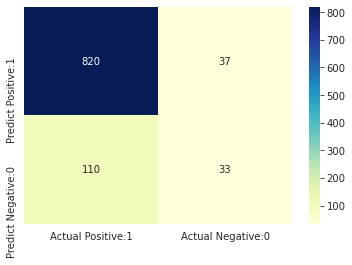

In [36]:
# Confusion matrix
logreg1_cm = confusion_matrix(y_test, y_predictions)
print('\nConfusion matrix\n', logreg1_cm)
plt.figure(figsize=(6,4))
logreg1_cm_df = pd.DataFrame(
    data=logreg1_cm,
    columns=['Actual Positive:1', 'Actual Negative:0'], 
    index=['Predict Positive:1', 'Predict Negative:0']
)
sns.heatmap(
    logreg1_cm_df,
    annot=True,
    fmt='d',
    cmap='YlGnBu'
)
plt.show()

### Model 2

all features except *phone number*
1. *k = 3*
2. Classes balanced (SMOTE)

Training metrics
Precision Score: 0.9743
Recall Score: 0.8951
Accuracy Score: 0.9358
F1 Score: 0.9331

Testing metrics
Precision Score: 0.3333
Recall Score: 0.1119
Accuracy Score: 0.8410
F1 Score: 0.1675

ROC Score - KNN: 53.73

Confusion matrix

 [[825  32]
 [127  16]]

AUC: 0.6064169203025679


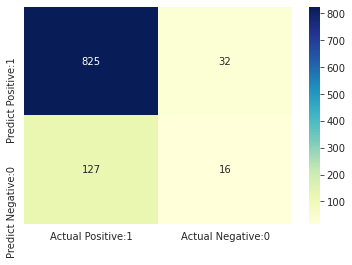

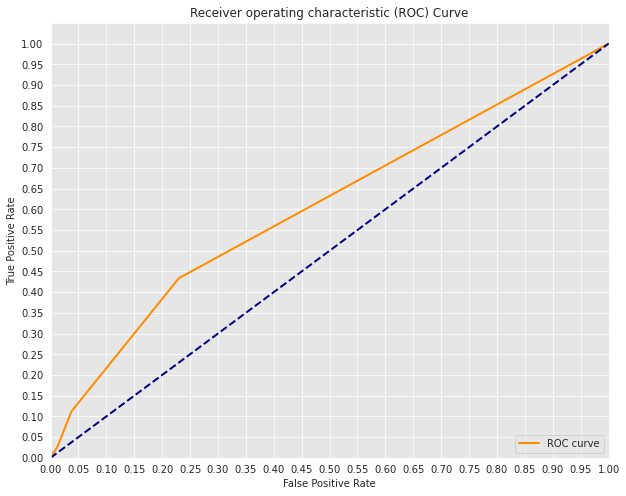

In [37]:
# Fit the model
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train_scaled, y_train_resampled)

# Predict using the model on training set
y_pred_train = knn2.predict(X_train_scaled)

# Predict using the model on test set
y_pred = knn2.predict(X_test_scaled)

print("Training metrics")
print_metrics(y_train_resampled, y_pred_train)

print("\nTesting metrics")
print_metrics(y_test, y_pred)

# Score the model
y_scores = knn2.predict_proba(X_test_scaled)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])

# Roc auc score
knn2_roc_score = roc_auc_score(y_test, y_pred)
print(f'\nROC Score - KNN: {round(knn2_roc_score, 4) * 100}')

# Plot confusion matrix
knn2_confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion matrix\n\n', knn2_confusion_matrix)
plt.figure(figsize=(6,4))
knn2_cm_matrix = pd.DataFrame(data=knn2_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(knn2_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Get AUC values
knn2_auc = auc(fpr, tpr)
print(f'\nAUC: {knn2_auc}')

# Draw ROC curve
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model 3

all features except *phone number*
1. *k = 5*
2. Classes balanced (SMOTE)

Training metrics
Precision Score: 0.9746
Recall Score: 0.8665
Accuracy Score: 0.9220
F1 Score: 0.9174

Testing metrics
Precision Score: 0.2432
Recall Score: 0.0629
Accuracy Score: 0.8380
F1 Score: 0.1000
ROC Score - KNN: 51.51
Confusion matrix

 [[829  28]
 [134   9]]
AUC: 0.6261311617204266


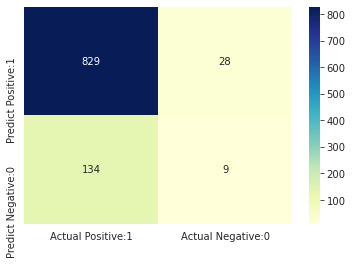

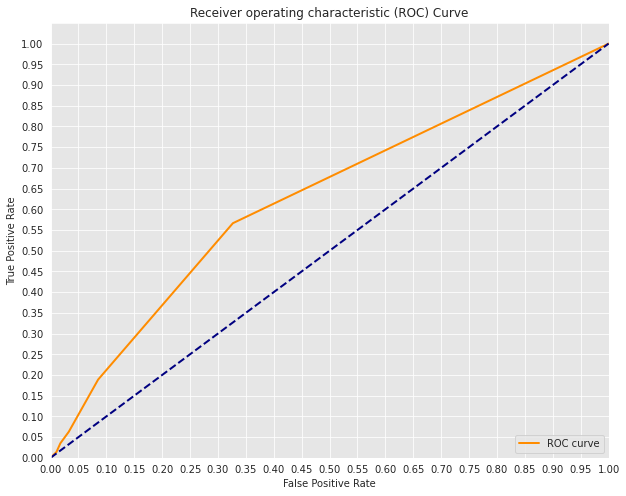

In [38]:
# Fit the model
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train_scaled, y_train_resampled)

# Predict
y_pred = knn3.predict(X_test_scaled)

# Predict using the model on training set
y_pred_train = knn3.predict(X_train_scaled)

# Training metrics
print("Training metrics")
print_metrics(y_train_resampled, y_pred_train)

# Testing metrics
print("\nTesting metrics")
print_metrics(y_test, y_pred)

# Score the model
y_scores = knn3.predict_proba(X_test_scaled)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])

# Roc score
knn3_roc_score = roc_auc_score(y_test, y_pred)
print(f'ROC Score - KNN: {round(knn3_roc_score, 4) * 100}')

# Plot confusion matrix
knn3_confusion_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', knn3_confusion_matrix)
plt.figure(figsize=(6,4))
knn3_cm_matrix = pd.DataFrame(data=knn3_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(knn3_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

knn3_auc = auc(fpr, tpr)
print(f'AUC: {knn3_auc}')

# Draw ROC curve
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model 4+

all features except *phone number*
1. *k = 1 - 31*
2. Classes balanced (SMOTE)

In [39]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=31):
    best_k = 0
    best_score = 0.0
    precision_ = 0.0
    recall_ = 0.0
    accuracy_ = 0.0
    k_range = range(min_k, max_k+1, 2)
    k_scores_accuracy = []
    
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        precision = precision_score(y_test, preds)
        recall = recall_score(y_test, preds)
        accuracy = accuracy_score(y_test, preds)
        k_scores_accuracy.append(accuracy)
        
        if f1 > best_score:
            best_k = k
            best_score = f1
            precision_ = precision
            recall_ = recall
            accuracy_ = accuracy
    
    plt.plot(k_range, k_scores_accuracy)
    plt.xticks(k_range)
    plt.xlabel('K values')
    plt.ylabel('Model Accuracy')
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    print("Precision: {}".format(precision_))
    print("Recall: {}".format(recall_))
    print("Accuracy: {}".format(accuracy_))

Best Value for k: 1
F1-Score: 0.21487603305785125
Precision: 0.26262626262626265
Recall: 0.18181818181818182
Accuracy: 0.81


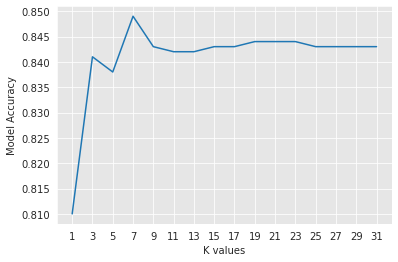

In [40]:
# Train multiple KNN classifiers
find_best_k(X_train_scaled, y_train_resampled, X_test_scaled, y_test)

### Model 5

Uses cross validation cv=5

In [41]:
knn5 = KNeighborsClassifier()
y_scores = cross_val_score(
    knn5,
    X_train_scaled,
    y_train_resampled,
    cv=5,
    scoring='accuracy'
)
print(f"Y scores for k = 5 and cv = 5\n{y_scores}")
print(f"Max accuracy k: {y_scores.max()}")


# Research more on what form of dataset to use; resampled or raw, split or not split before cv or grid search


# k_scores.append(scores.mean())
# plt.plot(k_range, k_scores)
# plt.xlabel("Value of K for KNN")
# plt.ylabel('Cross-Validation Accuracy')
# plt.show();

Y scores for k = 5 and cv = 5
[0.5726817  0.97741531 0.97992472 0.97741531 0.97867001]
Max accuracy k: 0.9799247176913425


In [42]:
knn5 = KNeighborsClassifier(n_neighbors=5)
y_scores = cross_val_score(
    knn5,
    X_train_scaled,
    y_train_resampled,
    cv=10,
    scoring='accuracy'
)

print(f"Y scores for k = 5 and cv = 10\n{y_scores}")
print(f"Max accuracy k: {y_scores.max()}")

Y scores for k = 5 and cv = 10
[0.51879699 0.6716792  0.98746867 0.97493734 0.98997494 0.98245614
 0.98241206 0.97236181 0.97738693 0.98492462]
Max accuracy k: 0.9899749373433584


In [43]:
knn5 = KNeighborsClassifier(n_neighbors=7)
y_scores = cross_val_score(
    knn5,
    X_train_scaled,
    y_train_resampled,
    cv=5,
    scoring='accuracy'
)
print(f"Y scores for k = 7 and cv = 5\n{y_scores}")
print(f"Max accuracy k: {y_scores.max()}")

Y scores for k = 7 and cv = 5
[0.57017544 0.97741531 0.98368883 0.98243413 0.98368883]
Max accuracy k: 0.9836888331242158


In [44]:
knn5 = KNeighborsClassifier(n_neighbors=7)
y_scores = cross_val_score(
    knn5,
    X_train_scaled,
    y_train_resampled,
    cv=10,
    scoring='accuracy'
)
print(f"Y scores for k = 7 and cv = 10\n{y_scores}")
print(f"Max accuracy k: {y_scores.max()}")

Y scores for k = 7 and cv = 10
[0.5037594  0.65914787 0.98746867 0.97243108 0.9924812  0.97744361
 0.98743719 0.97738693 0.98241206 0.98492462]
Max accuracy k: 0.9924812030075187


In [45]:
knn5 = KNeighborsClassifier(n_neighbors=7)
y_scores = cross_val_score(
    knn5,
    X_train_scaled,
    y_train_resampled,
    cv=15,
    scoring='accuracy'
)
print(f"Y scores for k = 7 and cv = 15\n{y_scores}")
print(f"Max accuracy k: {y_scores.max()}")

Y scores for k = 7 and cv = 15
[0.5        0.52255639 0.72556391 0.9887218  0.97744361 0.96616541
 0.9887218  0.98496241 0.98120301 0.98120301 0.9887218  0.97735849
 0.98490566 0.97735849 0.98867925]
Max accuracy k: 0.9887218045112782


In [46]:
# # Grid search

# # Define hyperparameters
# KNN_PARAMS = {
#     'n_neighbors': list(range(1, 31, 2)),
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2, 10],
#     'leaf_size': (20, 40, 1),
#     'metric': ('minkowski', 'chebyshev'),
# }
# # Define our model
# estimator = KNeighborsClassifier(algorithm='auto')

# # Create the grid search
# knn_grid_search1 = GridSearchCV(
#     estimator=estimator,
#     param_grid=KNN_PARAMS,
#     cv=10,
#     n_jobs=-1,
#     scoring='accuracy',
#     return_train_score=False # Set to True to get training scores but will take longer
# )

# # Fit to the data
# knn_grid_search1.fit(X_train_scaled, y_train_resampled)

# # Score the model
# knn_grid_search1_score = knn_grid_search1.score(X_test, y_test)

# # Check predictions
# y_preds = knn_grid_search1.predict(X_test)

# # Get confusion matrix
# knn_grid_search1_cm = confusion_matrix(y_test, y_preds)
# knn_grid_search1_cm

# # Plot confusion matrix
# print('Confusion matrix\n\n', knn_grid_search1_cm)
# plt.figure(figsize=(6,4))
# grid_cm_matrix = pd.DataFrame(
#     data=cm,
#     columns=['Actual Positive:1', 'Actual Negative:0'], 
#     index=['Predict Positive:1', 'Predict Negative:0']
# )
# sns.heatmap(
#     grid_cm_matrix,
#     annot=True,
#     fmt='d',
#     cmap='YlGnBu'
# )

# # Get best parameters
# print(grid_search1.best_params_)

# # Show scores
# print(f'Score: {knn_grid_search1_score}')

# # Display best score
# print('Best Score - KNN:', grid_search1.best_score_)

In [47]:
# # Grid search using KFold strategie
# kf = StratifiedKFold(n_splits=5)

# KNN_PARAMS = {
#     'n_neighbors': list(range(1, 31, 2)),
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2, 10],
#     'leaf_size': (20, 40, 1),
#     'metric': ('minkowski', 'chebyshev'),
# }
# estimator = KNeighborsClassifier(algorithm='auto')

# grid_search2 = GridSearchCV(
#     estimator=estimator,
#     param_grid=KNN_PARAMS,
#     cv=kf,
#     n_jobs=-1,
#     scoring='accuracy',
#     return_train_score=True,
#     verbose=1
# )
# # Fit to the data
# knn_grid_search2.fit(X_train_scaled, y_train_resampled)

# # Score the model
# knn_grid_search2_score = knn_grid_search2.score(X_test, y_test)

# # Check predictions
# y_preds = knn_grid_search2.predict(X_test)

# # Get confusion matrix
# knn_grid_search2_cm = confusion_matrix(y_test, y_preds)
# knn_grid_search2_cm

# # Plot confusion matrix
# print('Confusion matrix\n\n', knn_grid_search2_cm)
# plt.figure(figsize=(6,4))
# grid_cm_matrix = pd.DataFrame(
#     data=cm,
#     columns=['Actual Positive:1', 'Actual Negative:0'], 
#     index=['Predict Positive:1', 'Predict Negative:0']
# )
# sns.heatmap(
#     grid_cm_matrix,
#     annot=True,
#     fmt='d',
#     cmap='YlGnBu'
# )

# # Get best parameters
# print(grid_search2.best_params_)

# # Show scores
# print(f'Score: {knn_grid_search2_score}')

# # Display best score
# print('Best Score - KNN:', grid_search2.best_score_)

In [48]:
# knn_grid_search2_score

In [49]:
# print('Confusion matrix\n\n', cm)
# plt.figure(figsize=(6,4))
# grid_cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
#                                  index=['Predict Positive:1', 'Predict Negative:0'])
# sns.heatmap(grid_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


## Pipeline

In [50]:
X_train

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
2016,80,510,0,202.4,118,34.41,260.2,67,22.12,177.4,...,0,0,0,0,0,0,0,0,0,0
1362,63,510,0,132.9,122,22.59,67.0,62,5.70,160.4,...,0,0,0,0,0,0,1,0,0,0
2670,116,510,12,221.0,108,37.57,151.0,118,12.84,179.0,...,0,0,0,0,0,0,0,1,0,1
2210,71,415,0,278.9,110,47.41,190.2,67,16.17,255.2,...,0,1,0,0,0,0,0,0,0,0
1846,120,510,43,177.9,117,30.24,175.1,70,14.88,161.3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,510,0,274.4,120,46.65,198.6,82,16.88,160.8,...,0,0,0,0,0,0,0,0,0,0
1130,122,415,0,35.1,62,5.97,180.8,89,15.37,251.6,...,0,0,0,0,0,0,0,0,0,0
1294,66,408,0,87.6,76,14.89,262.0,111,22.27,184.6,...,0,0,0,0,0,0,0,0,0,0
860,169,415,0,179.2,111,30.46,175.2,130,14.89,228.6,...,0,0,0,0,0,0,0,0,0,0


              precision    recall  f1-score   support

           0       0.86      0.98      0.92       857
           1       0.42      0.07      0.12       143

    accuracy                           0.85      1000
   macro avg       0.64      0.53      0.52      1000
weighted avg       0.80      0.85      0.81      1000



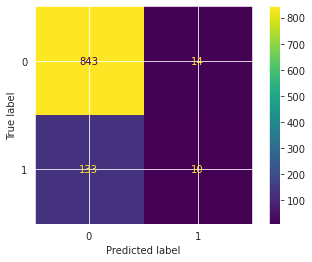

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y = y.astype('int')
# Encode categorical columns
categories_cols = [
    'international plan',
    'voice mail plan',
    'state'
]
ohe_column_transformer = ColumnTransformer(
    transformers=[
        (
            'ohe',
             OneHotEncoder(
                 categories='auto',
                 handle_unknown='ignore'
             ),
            categories_cols
        )
    ],
    remainder='passthrough'
)

# Create pipeline
knn_pipeline = Pipeline([
    ('ohe_encoding', ohe_column_transformer),
    #('sampling', SMOTE(random_state=42)), # use with imblearn.pipeline import Pipeline
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', KNeighborsClassifier())
])

# Fit the train data
model = knn_pipeline.fit(X_train, y_train)

# Score the model
scores = knn_pipeline.score(X_test, y_test)

# Predictions
preds = knn_pipeline.predict(X_test)

# print(f"Score: {scores}")
# print(f"Preds: {}")

print(classification_report(y_test, preds))
ConfusionMatrixDisplay.from_predictions(y_test, preds);